#LAB 3

##importing libraries

In [ ]:
from operator import imod
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
from cycler import cycler
import sklearn.naive_bayes as nb
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve


import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split as tts
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import accuracy_score as acc
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from math import ceil

##Problem 01

###Part 1

In [ ]:
tit = pd.read_csv("/content/drive/MyDrive/PRML/LAB03/titanic.csv",usecols=['Fare',"Sex","Age","Embarked","Survived"])
tit


,Sex,Age,Fare,Embarked,Survived
0,male,22.0,7.2500,S,0
1,female,38.0,71.2833,C,1
2,female,26.0,7.9250,S,1
3,female,35.0,53.1000,S,1
4,male,35.0,8.0500,S,0
...,...,...,...,...,...
886,male,27.0,13.0000,S,0
887,female,19.0,30.0000,S,1
888,female,NaN,23.4500,S,0
889,male,26.0,30.0000,C,1


In [ ]:
tit=tit.dropna()


In [ ]:
tit['Age']=tit['Age'].astype(int)
tit=tit.drop(tit[tit['Age']<1].index)

tit

<ipython-input-8-b93ab61ff234>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tit['Age']=tit['Age'].astype(int)


,Sex,Age,Fare,Embarked,Survived
0,male,22,7.2500,S,0
1,female,38,71.2833,C,1
2,female,26,7.9250,S,1
3,female,35,53.1000,S,1
4,male,35,8.0500,S,0
...,...,...,...,...,...
885,female,39,29.1250,Q,0
886,male,27,13.0000,S,0
887,female,19,30.0000,S,1
889,male,26,30.0000,C,1


0.19642857142857142
0.7509727626459144


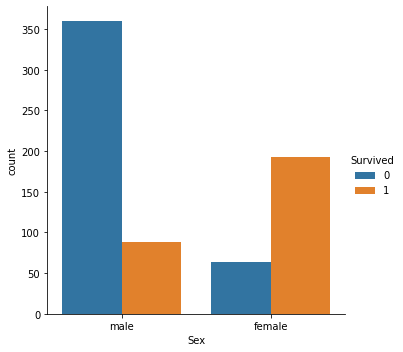

In [ ]:
sns.catplot(x='Sex',hue='Survived',kind='count',data=tit)
total_men=len(tit[(tit['Sex']=='male')].index)
total_men_survived=len(tit[(tit['Sex']=='male')&(tit['Survived']==1)].index)
total_women=len(tit[(tit['Sex']=='female')].index)
total_women_survived=len(tit[(tit['Sex']=='female')&(tit['Survived']==1)].index)

# total_men_survived = np.where(((tit['Sex']=='male') and (tit['Survived']==1)).bool)
print((total_men_survived/total_men))
print(total_women_survived/total_women)

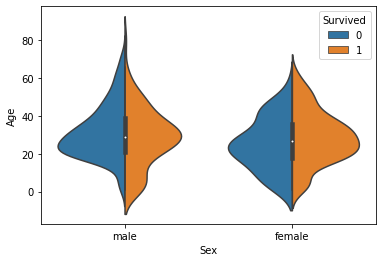

In [ ]:
sns.violinplot(x ="Sex", y ="Age", hue ="Survived",data = tit, split = True)

0.35818181818181816
0.5984251968503937
0.2857142857142857


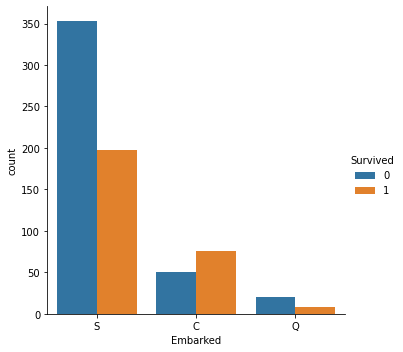

In [ ]:
sns.catplot(x='Embarked',hue='Survived',kind='count',data=tit)
total_S=len(tit[(tit['Embarked']=='S')].index)
total_S_survived=len(tit[(tit['Embarked']=='S')&(tit['Survived']==1)].index)
total_C=len(tit[(tit['Embarked']=='C')].index)
total_C_survived=len(tit[(tit['Embarked']=='C')&(tit['Survived']==1)].index)
total_Q=len(tit[(tit['Embarked']=='Q')].index)
total_Q_survived=len(tit[(tit['Embarked']=='Q')&(tit['Survived']==1)].index)

print(total_S_survived/total_S)
print(total_C_survived/total_C)
print(total_Q_survived/total_Q)



In [ ]:
# sns.catplot(x='Pclass',hue='Survived',kind='count',data=tit)
# total_1=len(tit[(tit['Pclass']==1)].index)
# total_1_survived=len(tit[(tit['Pclass']==1)&(tit['Survived']==1)].index)
# total_2=len(tit[(tit['Pclass']==2)].index)
# total_2_survived=len(tit[(tit['Pclass']==2)&(tit['Survived']==1)].index)
# total_3=len(tit[(tit['Pclass']==3)].index)
# total_3_survived=len(tit[(tit['Pclass']==3)&(tit['Survived']==1)].index)

# print(total_1_survived/total_1)
# print(total_2_survived/total_2)
# print(total_3_survived/total_3)

In [ ]:
lab_enc = LabelEncoder()
tit['Sex']=lab_enc.fit_transform(tit['Sex'])
tit['Embarked']=lab_enc.fit_transform(tit['Embarked'])
tit=tit.set_index(np.arange(len(tit)))

tit

,Sex,Age,Fare,Embarked,Survived
0,1,22,7.2500,2,0
1,0,38,71.2833,0,1
2,0,26,7.9250,2,1
3,0,35,53.1000,2,1
4,1,35,8.0500,2,0
...,...,...,...,...,...
700,0,39,29.1250,1,0
701,1,27,13.0000,2,0
702,0,19,30.0000,2,1
703,1,26,30.0000,0,1


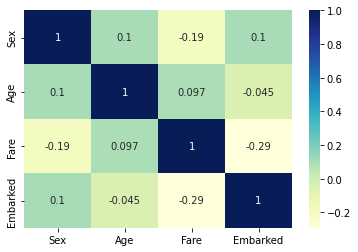

In [ ]:
dataplot = sns.heatmap(tit.drop(["Survived"],axis=1).corr(), cmap="YlGnBu", annot=True)

In [ ]:
X=tit.drop("Survived",axis=1)
Y=tit["Survived"]
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.2,shuffle=True)


print(X_train.shape,X_test.shape)

(564, 4) (141, 4)


In [ ]:
X_train.set_index(np.arange(X_train.shape[0]),inplace=True)
X_test.set_index(np.arange(X_test.shape[0]),inplace=True)
Y_train.index=np.arange(len(Y_train))
Y_test.index=np.arange(len(Y_test))

###Part 2

Best naive bayes classifier for this dataset is gaussian naive bayes classifier

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


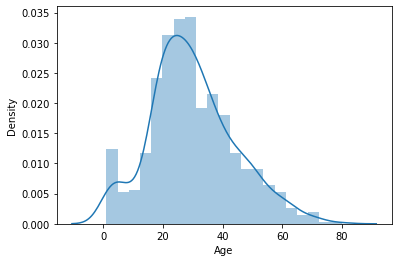

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


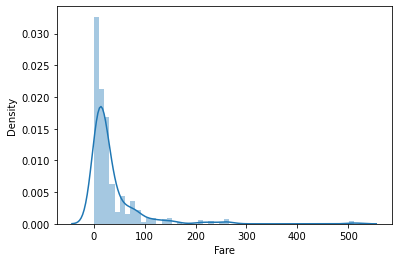

In [ ]:
for dataheader in ["Age","Fare"]:
  sns.distplot(X[dataheader])
  plt.show()

In [ ]:
for func in [nb.GaussianNB,nb.MultinomialNB,nb.BernoulliNB,nb.CategoricalNB,nb.ComplementNB]:
  Bayes_model=func().fit(X_train,Y_train)
  print("mse for ",func,"is ",mse(Bayes_model.predict(X_test),Y_test))


nb_gauss = nb.GaussianNB().fit(X_train[["Age","Fare"]],Y_train)
nb_cat=nb.CategoricalNB().fit(X_train[["Sex","Embarked"]],Y_train)
gauss_probs = nb_gauss.predict_proba(X_test[["Age","Fare"]])
cat_probs=nb_cat.predict_proba(X_test[["Sex","Embarked"]])
total_y_probs = np.multiply(gauss_probs,cat_probs)
y_pred=np.zeros(len(total_y_probs))
for i in range(len(y_pred)):
  if(total_y_probs[i][1]>total_y_probs[i][0]):
    y_pred[i]=1
print("mse for mixed naive bayes classifier is ",mse(y_pred,Y_test))

mse for  <class 'sklearn.naive_bayes.GaussianNB'> is  0.1702127659574468
mse for  <class 'sklearn.naive_bayes.MultinomialNB'> is  0.3404255319148936
mse for  <class 'sklearn.naive_bayes.BernoulliNB'> is  0.18439716312056736
mse for  <class 'sklearn.naive_bayes.CategoricalNB'> is  0.20567375886524822
mse for  <class 'sklearn.naive_bayes.ComplementNB'> is  0.3191489361702128
mse for mixed naive bayes classifier is  0.3049645390070922


###Part 3

In [ ]:
final_bayes_model=nb.GaussianNB().fit(X_train,Y_train)
Y_pred=final_bayes_model.predict(X_test)
print(final_bayes_model.score(X_test,Y_test))

0.8297872340425532


In [ ]:
def confusion_matrix(test_y,pred_y):
  # Understand the Concept, write the code from scratch and remove "pass"
  out=np.zeros((2,2),dtype=int)
  for i in range(len(test_y)):
      out[test_y[i],pred_y[i]]+=1
  return out
def avg_accuracy(test_y,pred_y):
  # Understand the Concept, write the code from scratch and remove "pass"
  cm_log = confusion_matrix(test_y,pred_y)
  out = (cm_log[0,0]+cm_log[1,1])/(cm_log.sum())
  return out

def precision(test_y,pred_y):
  # Understand the Concept, write the code from scratch and remove "pass"
  cm = confusion_matrix(test_y,pred_y)
  out = cm[1,1]/(cm[1,1]+cm[0,1])
  return out

def recall(test_y,pred_y):
  # Understand the Concept, write the code from scratch and remove "pass"
  cm = confusion_matrix(test_y,pred_y)
  out = cm[1,1]/(cm[1,1]+cm[1,0])
  return out

def f1_score(test_y,pred_y):
  # Understand the Concept, write the code from scratch and remove "pass"
  p=precision(test_y,pred_y)
  r=recall(test_y,pred_y)
  out = 2/((1/p)+(1/r))
  return out
def class_accuracy(test_y,pred_y):
  # Understand the Concept, write the code from scratch and remove "pass"
  cm=confusion_matrix(test_y,pred_y)
  out = [(cm[0,0]/(cm[0,0]+cm[0,1])),(cm[1,1]/(cm[1,1]+cm[1,0]))]
  return out

def sensitivity(test_y,pred_y):
  # Understand the Concept, write the code from scratch and remove "pass"
  cm=confusion_matrix(test_y,pred_y)
  out = cm[1,1]/(cm[1,1]+cm[1,0])
  return out

def specificity(test_y,pred_y):
  # Understand the Concept, write the code from scratch and remove "pass"
  cm=confusion_matrix(test_y,pred_y)
  out = cm[0,0]/(cm[0,0]+cm[0,1])
  return out

accuracy score is 0.8297872340425532
confusion matrix
 [[70 10]
 [14 47]]
Precision is  0.8245614035087719
recall is  0.7704918032786885
F1 score is  0.7966101694915254
Class wise accuracy is [0.875, 0.7704918032786885]
Sensitivity is  0.7704918032786885
Specificity is  0.875
roc curve


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


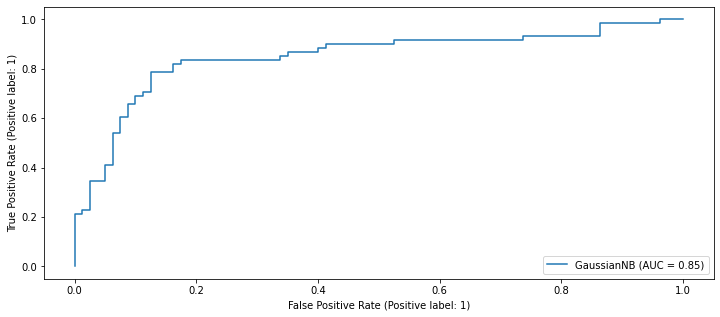

In [ ]:
print("accuracy score is",avg_accuracy(Y_test,Y_pred))
print("confusion matrix\n",confusion_matrix(Y_test,Y_pred))
print("Precision is ", precision(Y_test,Y_pred))
print("recall is ", recall(Y_test,Y_pred))
print("F1 score is ",f1_score(Y_test,Y_pred))
print("Class wise accuracy is",class_accuracy(Y_test,Y_pred))
print("Sensitivity is ",sensitivity(Y_test,Y_pred))
print("Specificity is ",specificity(Y_test,Y_pred))
print("roc curve")
plot_roc_curve(final_bayes_model,X_test,Y_test)

###Part 4

In [ ]:
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
temp_gauss_model=nb.GaussianNB()
cv=KFold(n_splits=5,random_state=42,shuffle=True)
scores = cross_val_score(temp_gauss_model, X, Y,cv=cv,n_jobs=-1)

print("mean score ",np.mean(scores))
print("variance ",np.var(scores))


mean score  0.7815602836879433
variance  0.0019194205522861016


In [ ]:
y_pred_probs = final_bayes_model.predict_proba(X_test)
for i in range(len(y_pred_probs)):
  print(max(y_pred_probs[i]))

0.9402080927364049
0.9359098419891424
0.9505631856171912
0.7021375619087162
0.9209269982344069
0.9997889105644411
0.9619384330222082
0.9325519083223228
0.9305068832282702
0.9452656217633366
0.7894502324825841
0.9312828571044136
0.6882065919797983
0.9348902672198279
0.9362560321659787
0.6742901005171927
0.7707460517699818
0.9341849959279285
0.9371036537388534
0.9325164633723568
0.9401650496201476
0.979776151010229
0.920047934971505
0.93526785430881
0.6737597933805463
0.9538572743068825
0.9635572852686495
1.0
0.9118411396688234
0.9317536223612564
0.9371816830563371
0.7304792806074866
0.8767402469833083
0.9999999992058761
0.7707984542852016
0.9424104899488233
0.9474348235630942
0.5291031019640005
0.9351306538739479
0.9443791537067967
0.6366812294328541
0.9319217707458676
0.580417913109684
0.925369279345426
0.7471508213407484
0.6662938580449866
0.6714643757655855
0.94157787387765
0.999745522976349
0.9375866027085898
0.9312093351322878
0.9330137405360881
0.6975065588990601
0.933204821659842

###Part 5


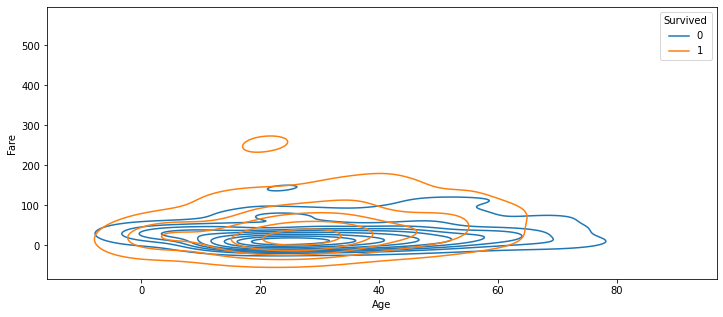

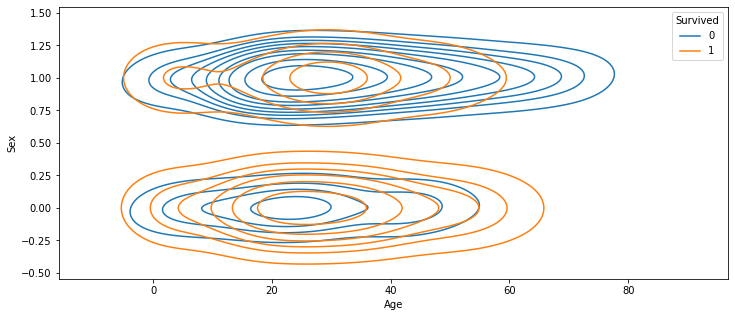

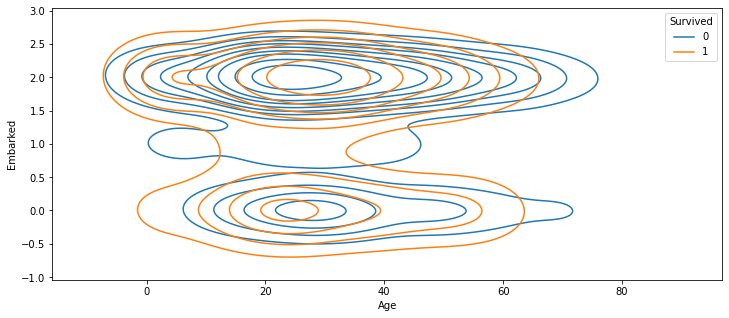

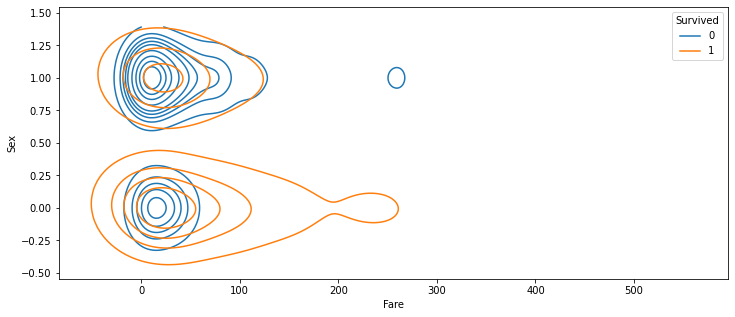

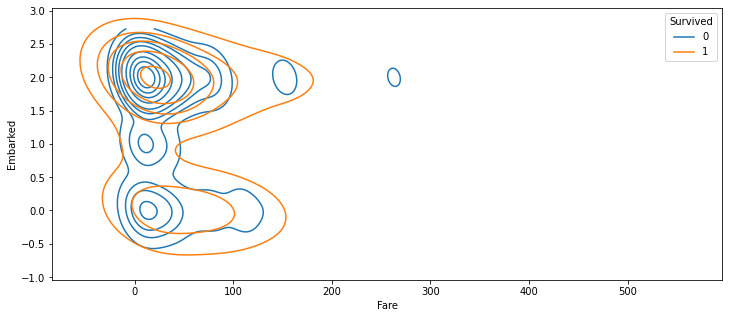

In [ ]:
sns.kdeplot(data=tit, x='Age', y='Fare', hue='Survived')
plt.show()
sns.kdeplot(data=tit,x='Age',y='Sex',hue='Survived')
plt.show()
sns.kdeplot(data=tit, x='Age', y='Embarked', hue='Survived')
plt.show()
sns.kdeplot(data=tit,x='Fare',y='Sex',hue='Survived')
plt.show()
sns.kdeplot(data=tit, x='Fare', y='Embarked', hue='Survived')
plt.show()


###Part 6

In [ ]:
dec_clf = DecisionTreeClassifier().fit(X_train,Y_train)
print(dec_clf.score(X_test,Y_test))

0.7304964539007093


In [ ]:
temp_DTC_model=DecisionTreeClassifier()
cv=KFold(n_splits=5,random_state=42,shuffle=True)
scores_DTC = cross_val_score(temp_DTC_model, X, Y,cv=cv,n_jobs=-1)
print("Gaussian Naive Bayes Classifier")
print("mean score ",np.mean(scores))
print("variance ",np.var(scores))
print("\nDecision Tree Classifier")
print("mean score ",np.mean(scores_DTC))
print("variance ",np.var(scores_DTC))

Gaussian Naive Bayes Classifier
mean score  0.7815602836879433
variance  0.0019194205522861016

Decision Tree Classifier
mean score  0.7432624113475177
variance  0.0012353503344902169


##Problem 2


###Part 1

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/PRML/LAB03/dataset (1).csv");
df


,X0,X1,X2,X3,X4,X5,X6,Y
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


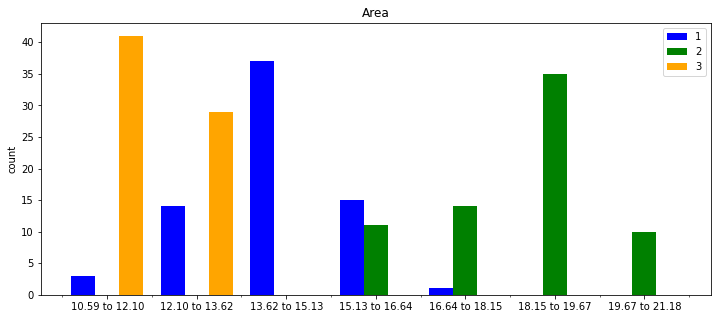

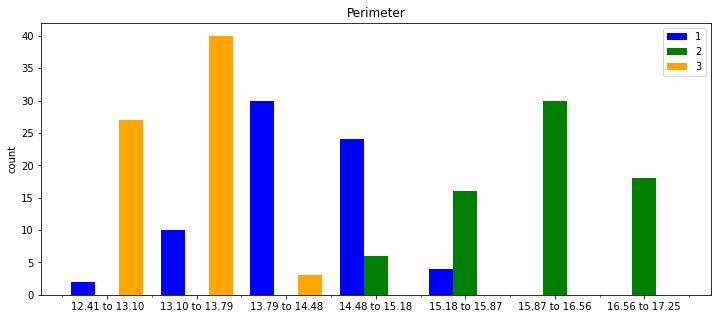

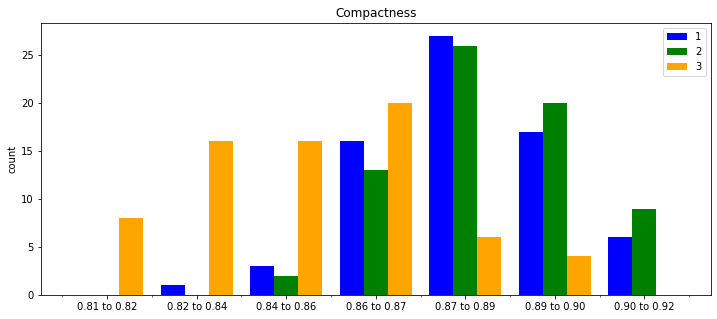

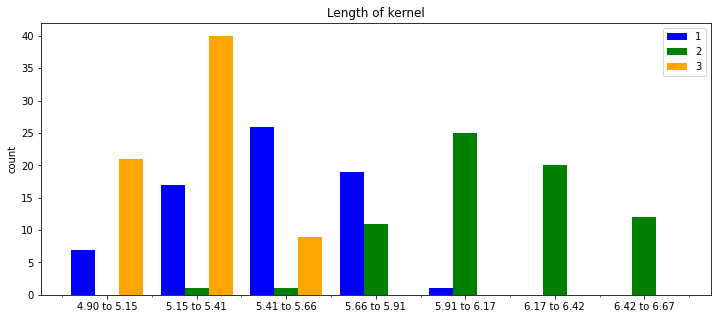

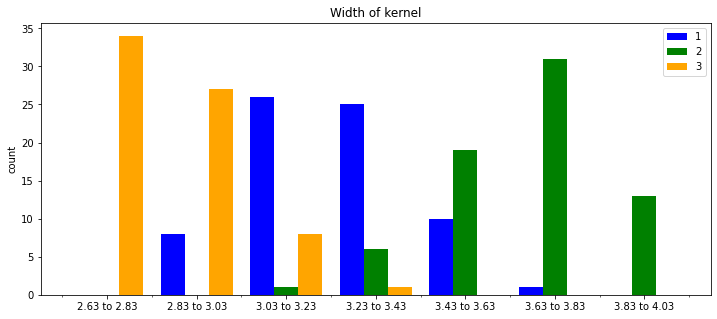

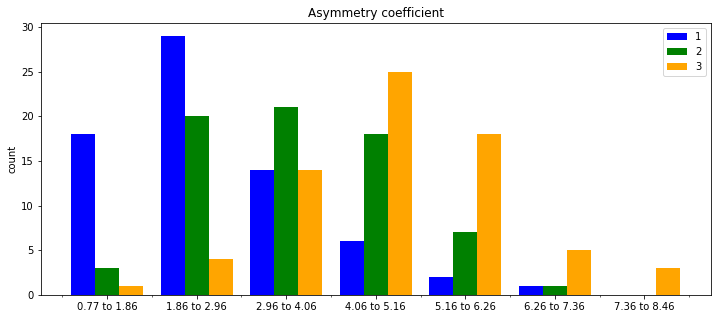

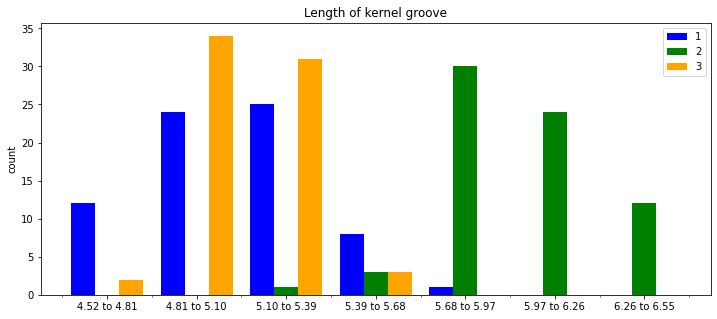

In [ ]:
plt.rcParams['figure.figsize'] = [12, 5]
dataheaders=["Area","Perimeter","Compactness","Length of kernel","Width of kernel","Asymmetry coefficient","Length of kernel groove"]
for dataheader,i in zip(df.columns[:-1],range(len(dataheaders))):
  x1 = list(df[df['Y'] == 1][dataheader])
  x2 = list(df[df['Y'] == 2][dataheader])
  x3 = list(df[df['Y'] == 3][dataheader])

  
  colors=['blue', 'green', 'orange']
  names=[1,2,3]

  
  n,bins,patches=plt.hist([x1, x2, x3], color=colors,bins=7, label=names, density=False)

  
  
  plt.legend()
  # define minor ticks and draw a grid with them
  minor_locator = AutoMinorLocator(2)
  plt.gca().xaxis.set_minor_locator(minor_locator)
  plt.grid(which='minor', color='white', lw = 0.5)
  # x ticks
  xticks = [(bins[idx+1] + value)/2 for idx, value in enumerate(bins[:-1])]
  xticks_labels = [ "{:.2f} to {:.2f}".format(value, bins[idx+1]) for idx, value in enumerate(bins[:-1])]
  plt.xticks(xticks, labels = xticks_labels)
  plt.title(dataheaders[i])
  plt.ylabel("count")
  plt.show()
  print('\n\n')


###Part 2

In [ ]:
def class_probability(df,class_no,col):
  return (len(np.where(df[col]==class_no)[0]))/len(df[col])

for i in range(1,4):
  print("prior probability of class ",i,"is ",class_probability(df,i,'Y'))


prior probability of class  1 is  0.3333333333333333
prior probability of class  2 is  0.3333333333333333
prior probability of class  3 is  0.3333333333333333


###Part 3

In [ ]:
def makeBins(df,no_of_bins):
  dis_df=df.copy()
  for col in df.columns[:-1]:

    min=df[col].min()
    dif=(df[col].max()-min)/no_of_bins
    for i in range(len(df[col])):
      dis_df[col][i]=ceil((df[col][i]-min)/dif)-1
  dis_df=dis_df.astype(int)
  return dis_df

no_of_bins=7
dis_df=makeBins(df,no_of_bins)
dis_df
  
    



  



<ipython-input-36-b3178f6556d7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dis_df[col][i]=ceil((df[col][i]-min)/dif)-1


,X0,X1,X2,X3,X4,X5,X6,Y
0,3,3,3,3,3,1,2,1
1,2,3,4,2,3,0,1,1
2,2,2,6,1,3,1,1,1
3,2,2,5,1,3,1,0,1
4,3,3,6,2,4,0,2,1
...,...,...,...,...,...,...,...,...
205,1,1,4,0,1,2,1,3
206,0,0,2,0,0,3,1,3
207,1,1,5,1,3,6,1,3
208,0,1,2,1,1,2,1,3


###Part 4

In [ ]:
def likelihood(df,col,y,bin_no):
  idx=np.where(df['Y']==y)
  count=0
  for i in idx[0]:
    if df[col][i]==bin_no:
      count+=1
  if(count==0):
    count=1/len(df.index)
  return count/len(idx[0])

def likelihoodForAllBins(df,col,y,total_bins):
  lhlist=np.zeros(total_bins)
  for i in range(total_bins):
    lhlist[i]=likelihood(df,col,y,i)
  return lhlist

n_classes=3
for i in range(1,n_classes+1):
  print("Class ",i)
  for dataheader in dis_df.columns[:-1]:
    print("Column: ",dataheader)
    print(likelihoodForAllBins(dis_df,dataheader,i,no_of_bins))
    print(sum(likelihoodForAllBins(dis_df,dataheader,i,no_of_bins)))
  print('\n\n')




Class  1
Column:  X0
[0.04285714 0.2        0.52857143 0.21428571 0.01428571 0.
 0.        ]
1.0
Column:  X1
[0.02857143 0.14285714 0.42857143 0.34285714 0.05714286 0.
 0.        ]
1.0
Column:  X2
[0.         0.01428571 0.04285714 0.22857143 0.38571429 0.24285714
 0.08571429]
1.0
Column:  X3
[0.1        0.24285714 0.37142857 0.27142857 0.01428571 0.
 0.        ]
1.0
Column:  X4
[0.         0.11428571 0.37142857 0.35714286 0.14285714 0.01428571
 0.        ]
1.0
Column:  X5
[0.24285714 0.41428571 0.2        0.08571429 0.02857143 0.01428571
 0.        ]
0.9857142857142858
Column:  X6
[0.15714286 0.34285714 0.35714286 0.11428571 0.01428571 0.
 0.        ]
0.9857142857142858



Class  2
Column:  X0
[0.         0.         0.         0.15714286 0.2        0.5
 0.14285714]
1.0
Column:  X1
[0.         0.         0.         0.08571429 0.22857143 0.42857143
 0.25714286]
1.0
Column:  X2
[0.         0.         0.02857143 0.18571429 0.37142857 0.28571429
 0.12857143]
1.0
Column:  X3
[0.         0.01

###Part 5

Class  1


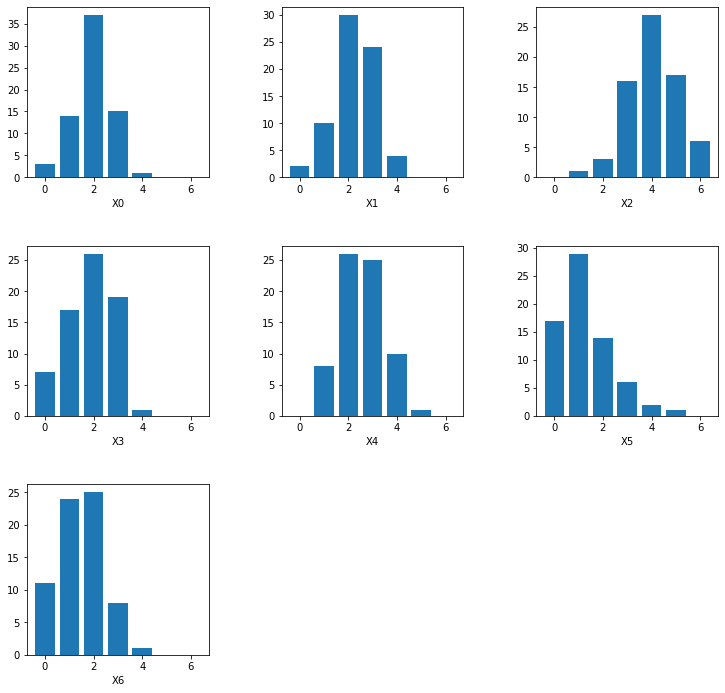

Class  2


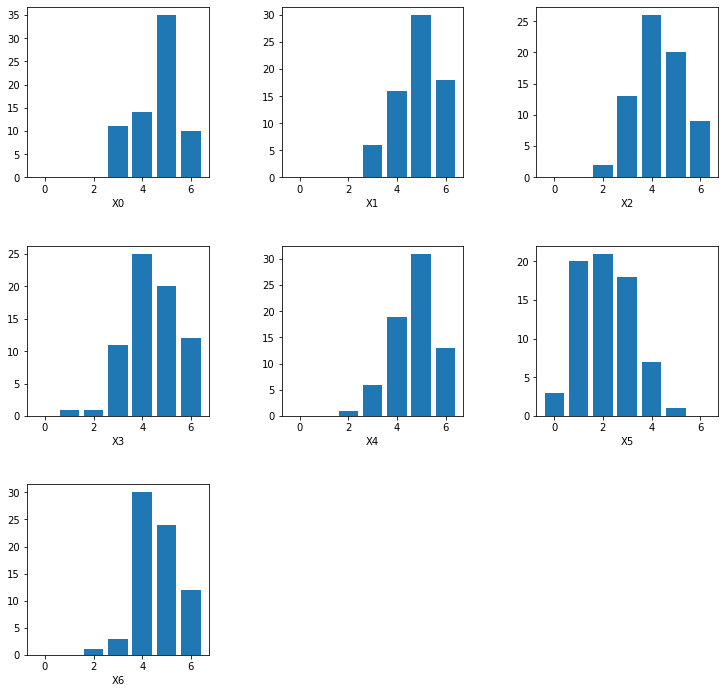

Class  3


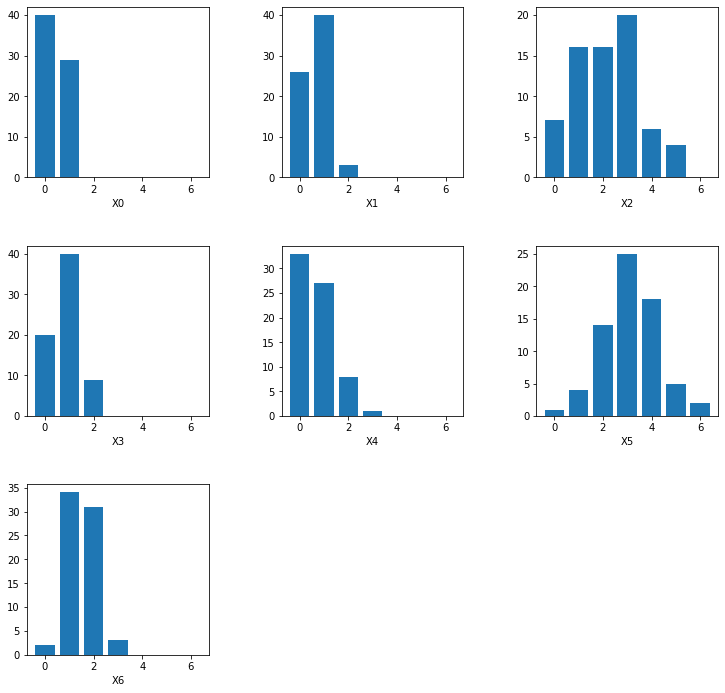

In [ ]:
for i in range(1,n_classes+1):
  print("Class ",i)
  plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=1.9,wspace=0.4,hspace=0.4)
  for j in range(len(dis_df.columns)-1):
    plt.subplot(3,3,j+1)
    # count_list=(likelihoodForAllBins(dis_df,dis_df.columns[j],i,no_of_bins)*(len(np.where())))
    plt.bar(np.arange(no_of_bins),((likelihoodForAllBins(dis_df,dis_df.columns[j],i,no_of_bins))*(len(np.where(dis_df['Y']==i)[0]))))
    # print(((likelihoodForAllBins(dis_df,dis_df.columns[j],i,no_of_bins))*(len(np.where(dis_df['Y']==i)))))
    plt.xlabel(dis_df.columns[j])
  plt.show()
  

###Part 6


In [ ]:
training_data,testing_data=tts(dis_df,test_size=0.2,shuffle=True)
training_data=training_data.set_index(np.arange(training_data.shape[0]))
testing_data=testing_data.set_index(np.arange(testing_data.shape[0]))

<ipython-input-213-de3578ab1420>:19: RuntimeWarning: invalid value encountered in true_divide
  out=out/sm_of_all_pp


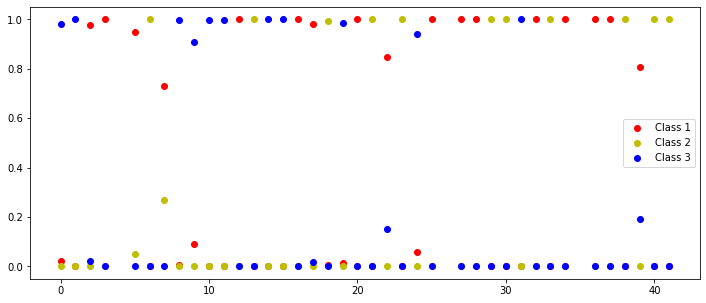

In [ ]:



def posterior_probability(df,sample,class_no):
  total_likelihood=1
  
  for i in range(len(df.columns)-1):
    
    total_likelihood*=likelihood(df,df.columns[i],class_no,sample[i])
  # if(total_likelihood==0):
  #     total_likelihood=(1/len(df.index))**7
  
  posterior=total_likelihood*class_probability(df,class_no,df.columns[-1])
  return posterior

def normalized_posterior_probability(df,sample,n_classes):
  out=np.zeros(n_classes)
  # print(1)
  for i in range(1,n_classes+1):
    out[i-1]=posterior_probability(df,sample,i)
  sm_of_all_pp=sum(out)
  out=out/sm_of_all_pp
  
  return list(out)

# x_axis=np.arange(len(df.index),dtype=int)
# # print(x_axis)

colors=['r','y','b']
# print(testing_data.columns[2])
for i in range(len(testing_data.index)):
  
  pp=normalized_posterior_probability(training_data,list(testing_data.iloc[i,:-1]),3)
  for j in range(3):
    plt.scatter(i,pp[j],color=colors[j])
plt.legend(['Class 1','Class 2','Class 3'],loc="best")
  # print(list(testing_data.iloc[i,:-1]))
# print(training_data)
# print(type(training_data),type(dis_df),type(testing_data))





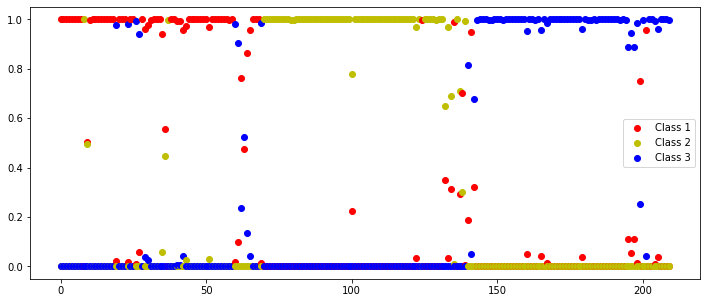

In [ ]:



def posterior_probability(df,sample,class_no):
  total_likelihood=1
  
  for i in range(len(df.columns)-1):
    
    total_likelihood*=likelihood(df,df.columns[i],class_no,sample[i])
  # if(total_likelihood==0):
  #   total_likelihood=(1/len(df.index))**7
  posterior=total_likelihood*class_probability(df,class_no,df.columns[-1])
  return posterior

def normalized_posterior_probability(df,sample,n_classes):
  out=np.zeros(n_classes)
  # print(1)
  for i in range(1,n_classes+1):
    out[i-1]=posterior_probability(df,sample,i)
  sm_of_all_pp=sum(out)
  out=out/sm_of_all_pp
  
  return list(out)

# x_axis=np.arange(len(df.index),dtype=int)
# # print(x_axis)

colors=['r','y','b']
# print(testing_data.columns[2])
for i in range(len(dis_df.index)):
  
  pp=normalized_posterior_probability(dis_df,list(dis_df.iloc[i,:-1]),3)
  for j in range(3):
    plt.scatter(i,pp[j],color=colors[j])
plt.legend(['Class 1','Class 2','Class 3'],loc="best")
  # print(list(testing_data.iloc[i,:-1]))
# print(training_data)
# print(type(training_data),type(dis_df),type(testing_data))



